In [6]:
import os

# # Set Hugging Face cache directory as default
# os.environ['HF_HOME'] = os.path.expanduser('~/.cache/huggingface')
# os.environ['TRANSFORMERS_CACHE'] = os.path.expanduser('~/.cache/huggingface/transformers')

def disable_ssl():
    # Fix SSL certificate verification issues on Windows
    import ssl
    import warnings
    warnings.filterwarnings('ignore', message='Unverified HTTPS request')

    # Disable SSL verification globally
    ssl._create_default_https_context = ssl._create_unverified_context

    # Patch requests to disable SSL verification
    import requests
    from functools import partialmethod
    requests.Session.request = partialmethod(requests.Session.request, verify=False)
    requests.request = partialmethod(requests.request, verify=False)

In [7]:
from PIL import Image
from surya.foundation import FoundationPredictor
from surya.recognition import RecognitionPredictor
from surya.detection import DetectionPredictor

disable_ssl()
image = Image.open(r"C:\Users\I1000929\Downloads\Smart-Licence-Card-1.jpg")

foundation_predictor = FoundationPredictor()
recognition_predictor = RecognitionPredictor(foundation_predictor)
detection_predictor = DetectionPredictor()

predictions = recognition_predictor([image], det_predictor=detection_predictor)

Recognizing Text: 100%|██████████| 17/17 [00:08<00:00,  1.91it/s]


In [8]:
predictions

[OCRResult(text_lines=[TextLine(polygon=[[154.0, 16.0], [512.0, 16.0], [512.0, 36.0], [154.0, 36.0]], confidence=0.9750495609782991, text='GOVERNMENT OF NEPAL', chars=[TextChar(polygon=[[154.0, 16.0], [154.0, 17.0], [155.0, 17.0], [155.0, 16.0]], confidence=0.9989140033721924, text='', bbox_valid=False, bbox=[154.0, 16.0, 155.0, 17.0]), TextChar(polygon=[[154.0, 16.0], [154.0, 17.0], [155.0, 17.0], [155.0, 16.0]], confidence=0.9985888600349426, text='', bbox_valid=False, bbox=[154.0, 16.0, 155.0, 17.0]), TextChar(polygon=[[243.0, 21.0], [422.0, 20.0], [422.0, 30.0], [243.0, 31.0]], confidence=0.4915893077850342, text='G', bbox_valid=True, bbox=[243.0, 20.0, 422.0, 31.0]), TextChar(polygon=[[243.0, 21.0], [422.0, 20.0], [422.0, 30.0], [243.0, 30.0]], confidence=0.9979817867279053, text='O', bbox_valid=True, bbox=[243.0, 20.0, 422.0, 30.0]), TextChar(polygon=[[243.0, 21.0], [422.0, 20.0], [422.0, 30.0], [243.0, 31.0]], confidence=0.9998953342437744, text='V', bbox_valid=True, bbox=[243.0

In [11]:
output=""
for result in predictions:   # ocr_results = list[OCRResult]
    for idx, line in enumerate(result.text_lines, start=1):
        output += f"{line.text} | (confidence={line.confidence:.2f})\n"

print(output)


GOVERNMENT OF NEPAL | (confidence=0.98)
NON PROFESSIONAL DRIVING LICENSE | (confidence=0.99)
D.L.No.: 006-818469 | (confidence=0.98)
Name: Chandra Man Shrestha | (confidence=1.00)
B.G.: AB+ | (confidence=0.82)
Address: .Tinmanebhaniyang, | (confidence=0.94)
Gherung, Gandaki, | (confidence=0.96)
Gorkha, Nepal | (confidence=0.97)
D.O.B.: 29-05-1963 | (confidence=0.98)
F/H Name: Resham lal Shrestha | (confidence=1.00)
Citizenship No.: 478 | (confidence=0.99)
Category: A.B. | (confidence=0.99)
D.O.L: 30-11-2015 | (confidence=0.96)
Passport No.: 0058728 | (confidence=0.94)
D.O.E.: 25-06-2018 | (confidence=0.98)
Phone No.: 9851006832 | (confidence=0.99)
Issued By | (confidence=0.95)



In [3]:
m = input("Press Enter to exit...")

In [4]:

import base64

with open("ocr_result.png", "wb") as f:
    f.write(base64.b64decode(m))


In [3]:
from PIL import Image
from surya.foundation import FoundationPredictor
from surya.layout import LayoutPredictor
from surya.settings import settings
disable_ssl()

image = Image.open("C:\\Users\\I1000929\\Downloads\\hhj.png")
layout_predictor = LayoutPredictor(FoundationPredictor(checkpoint=settings.LAYOUT_MODEL_CHECKPOINT))

# layout_predictions is a list of dicts, one per image
layout_predictions = layout_predictor([image])



Recognizing Layout: 100%|██████████| 1/1 [00:18<00:00, 18.04s/it]


In [4]:
layout_predictions

[LayoutResult(bboxes=[LayoutBox(polygon=[[68.92822265625, 23.90625], [494.75146484375, 19.921875], [494.75146484375, 362.578125], [68.92822265625, 366.5625]], confidence=0.48457562923431396, label='Picture', position=0, top_k={'Picture': 0.48457562923431396, 'SectionHeader': 0.4262927770614624, 'Text': 0.055744823068380356, 'Figure': 0.025582272559404373, 'PageHeader': 0.006222652271389961}, bbox=[68.92822265625, 19.921875, 494.75146484375, 366.5625]), LayoutBox(polygon=[[692.345703125, 88.65234375], [2499.796875, 84.66796875], [2499.796875, 210.17578125], [692.345703125, 214.16015625]], confidence=0.7956556081771851, label='SectionHeader', position=1, top_k={'SectionHeader': 0.7956556081771851, 'Text': 0.13582859933376312, 'Picture': 0.05947123095393181, 'PageHeader': 0.0042063994333148, 'Figure': 0.0037038119044154882}, bbox=[692.345703125, 84.66796875, 2499.796875, 214.16015625]), LayoutBox(polygon=[[1135.01806640625, 260.9765625], [2032.61669921875, 256.9921875], [2032.61669921875,

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def draw_polygons(image_path, layout_results):
    img = cv2.imread(image_path)

    for result in layout_results:
        for box in result.bboxes:
            pts = np.array(box.polygon, dtype=np.int32)

            # Draw polygon
            cv2.polylines(
                img,
                [pts],
                isClosed=True,
                color=(255, 0, 0),
                thickness=2
            )

            # Draw label
            x, y = pts[0]
            cv2.putText(
                img,
                box.label,
                (int(x), int(y - 5)),
                cv2.FONT_HERSHEY_SIMPLEX,
                0.6,
                (0, 255, 255),
                2
            )

    # ---- ALWAYS SHOW IN MATPLOTLIB ----
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(14, 8))
    plt.imshow(img_rgb)
    plt.axis("off")
    plt.title("Layout Polygons")
    plt.show()

    return img


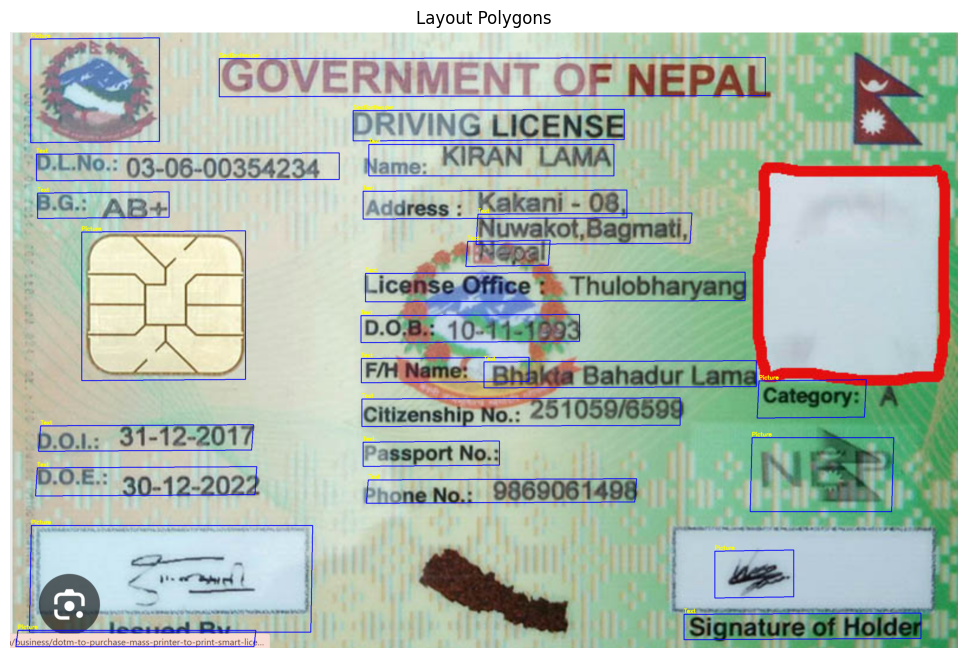

array([[[235, 235, 234],
        [234, 234, 233],
        [234, 234, 233],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[235, 235, 234],
        [234, 234, 233],
        [234, 234, 233],
        ...,
        [220, 233, 221],
        [220, 234, 222],
        [221, 234, 222]],

       [[235, 235, 234],
        [234, 234, 233],
        [234, 234, 233],
        ...,
        [133, 179, 137],
        [135, 181, 141],
        [136, 181, 142]],

       ...,

       [[213, 221, 248],
        [213, 221, 248],
        [213, 221, 248],
        ...,
        [110, 149, 112],
        [108, 147, 111],
        [108, 147, 111]],

       [[213, 221, 248],
        [213, 221, 248],
        [213, 221, 248],
        ...,
        [110, 150, 112],
        [107, 148, 111],
        [107, 147, 111]],

       [[213, 221, 248],
        [213, 221, 248],
        [213, 221, 248],
        ...,
        [109, 149, 112],
        [107, 147, 111],
        [107, 147, 111]]

In [8]:
draw_polygons("C:\\Users\\I1000929\\Downloads\\hhj.png", layout_predictions)

In [10]:
from PIL import Image
from surya.foundation import FoundationPredictor
from surya.layout import LayoutPredictor
from surya.recognition import RecognitionPredictor
from surya.detection import DetectionPredictor
from surya.settings import settings


# ---------------------------
# Geometry helper
# ---------------------------
def bbox_inside(inner, outer, threshold=0.7):
    ix1, iy1, ix2, iy2 = inner
    ox1, oy1, ox2, oy2 = outer

    inter_x1 = max(ix1, ox1)
    inter_y1 = max(iy1, oy1)
    inter_x2 = min(ix2, ox2)
    inter_y2 = min(iy2, oy2)

    inter_area = max(0, inter_x2 - inter_x1) * max(0, inter_y2 - inter_y1)
    inner_area = max(0, (ix2 - ix1) * (iy2 - iy1))

    if inner_area == 0:
        return False

    return (inter_area / inner_area) >= threshold


# ---------------------------
# Main pipeline
# ---------------------------
def layout_aware_ocr(image_path):
    image = Image.open(image_path)

    foundation = FoundationPredictor()

    # Layout
    layout_predictor = LayoutPredictor(
        FoundationPredictor(checkpoint=settings.LAYOUT_MODEL_CHECKPOINT)
    )

    # OCR
    recognition_predictor = RecognitionPredictor(foundation)
    detection_predictor = DetectionPredictor()

    layout_results = layout_predictor([image])
    ocr_results = recognition_predictor([image], det_predictor=detection_predictor)

    # ✔ Correct object access
    page_layouts = layout_results[0].bboxes
    page_ocr = ocr_results[0].text_lines

    structured_output = []

    for layout in page_layouts:
        if layout.label in {"Picture", "Figure"}:
            continue

        section = {
            "label": layout.label,
            "position": layout.position,
            "bbox": layout.bbox,
            "text_lines": []
        }

        for line in page_ocr:
            if bbox_inside(line.bbox, layout.bbox):
                section["text_lines"].append({
                    "text": line.text,
                    "confidence": line.confidence,
                    "bbox": line.bbox
                })

        if section["text_lines"]:
            structured_output.append(section)

    structured_output.sort(key=lambda x: x["position"])
    return structured_output


# ---------------------------
# Usage
# ---------------------------
IMAGE_PATH = r"C:\Users\I1000929\Downloads\hhj.png"

sections = layout_aware_ocr(IMAGE_PATH)

for sec in sections:
    print(f"\n## {sec['label']}")
    print(" ".join(t["text"] for t in sec["text_lines"]))


Recognizing Text: 100%|██████████| 22/22 [00:44<00:00,  2.01s/it]



## SectionHeader
GOVERNMENT OF NEPAL

## SectionHeader
DRIVING LICENSE

## Text
D.L.No.: 03-06-00354234

## Text
B.G .: AB+

## Text
31-12-2017 D.O.I.:

## Text
D.O.E.: 30-12-2022

## Text
Name: KIRAN LAMA

## Text
License Office: Thulobharyang

## Text
D.O.B.: 10-11-1993

## Text
Citizenship No.: 251059/6599

## Text
Passport No.:

## Text
9869061498 Phone No.:

## Text
Signature of Holder
